# Graded Challenge 3


## Perkenalan

Nama : Aan Nurliyanah

Batch : 002

## Query



Query yang digunakan untuk mengambil dataset ini adalah :


SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.heart-failure`




## Assignment Objective

Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep Classification dengan Ensemble Learning.
- Mampu mengimplementasikan Ensemble Learning untuk membuat prediksi.
- Mampu memahami konsep salah satu algoritma boosting dan mengimplementasikannya dalam kasus Supervised Learning

## Problems

Buatlah model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan.

## Import Libraries 

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Penggunaan library : 
- numpy, pandas, seaborn, matplotlib : untuk perhitungan data, pengolahan data, dan visualisasi data. 
- train_test_split : untuk memisahkan antara data train dan test 
- winsorizer : untuk handling outlier 
- DecisionTreeRegressor : untuk mencari feature selection 
- RandomForestClassifier,AdaboostClassifier: model yang digunakan.
- MinMaxScaler : untuk scaling numerical data
- accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix : untuk mengevalusi hasil model yang digunakan 
- cross_val_score : digunakna untuk mencari cross validation 
- GridSearchCV : untuk hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install feature_engine
!pip install sklearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading and Overview

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Dataset ini diambil dari Google BigQuery.
- Project ID : ftds-hacktiv8-project
- Dataset Name :phase1_ftds_002_hck
- Table Name : heart-failure

Keterangan data :



1. age = usia 
2. anaemia = berkurangnya hemoglobin 1=yes 0=no
3. creatinine_phosphokinase = level CPK enzim dalam satuan mcg/L
4. diabetes = jika pasien punya diabetes 1=yes 0=no
5. ejecttion_fraction =  presentase darah tidak mengalir ke jantung pada saat terjadi kontraksi
6. high_blood_pressure = jika pasien punya hipertensi 1=yes, 0=no
7. platelets = jumlah trombosit satuan kiloplatelets/mL
8. serum_ceratine = sampah hasil metabolisme otot yang mengalir pada sirkulasi darah dalam satuan mg/dL
9. serum_sodium  = jumlah serum sodium datuan mg/dL
10. sex = jenis kelamin 0=male, 1=female
11. smoking = pasien merokok 1=yes, 0=no
12. time = follow up period satuan hari 
13. death_event = jika pasien meninggal selama masa follow up 1=yes, 0=no

Loading data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values seperti '?',' ','99999','N/A' akan didefinisikan sebagai nan atau missing value, juga menggunakan parameter skipinitialspace untuk skip jika ada spasi di seluruh dataframe.

In [2]:
data = pd.read_csv('h8dsft_P1G3_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'],skipinitialspace=True)

Mengecek berapa banyak baris dan kolom pada dataset.

In [3]:
data.shape

(299, 13)

Menampilkan dataset default 5 teratas dengan fungsi head

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


Menampilkan data default 5 terbawah dengan menggunakan fungsi tail 

In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Melihat overview dari banyaknya baris dan kolom, dan jumlah baris di setiap kolom, nama kolom beserta tipe data nya. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari overview diatas didapatkan bahwa type data nya integer dan float. Dan tidak ada missing value, jumlah baris 299 terisi, dan 13 kolom. berikutnya akan kita double cek lagi.

Pengecekan data duplikat

In [7]:
data[data.duplicated()].shape

(0, 13)

Tidak ada data duplikat yang terdeteksi

Selanjutnya mengecek missing value

In [8]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
data.isnull().sum().any()

False

Tidak terdapat missing value di dalam data set ini .

Karena semua data bertipe integer namun didalam nya terdapat kategori , maka kita akan membagi ke dalam kolom numerical dan kategorikal secara manual.

Melihat nama nama kolom yang ada di dataset

In [10]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Mengecek overview dari keseluruhan data, melihat central tendency, q1,q2,q3, min max.

In [11]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Melihat jumlah value di seluruh dataset yang terisi di setiap kolom nya.

In [12]:
for i in data:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

age

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
40.000     7
80.000     7
42.000     7
72.000     7
85.000     6
62.000     5
68.000     5
52.000     5
51.000     4
73.000     4
59.000     4
49.000     4
61.000     4
82.000     3
90.000     3
46.000     3
69.000     3
64.000     3
54.000     2
77.000     2
44.000     2
78.000     2
95.000     2
60.667     2
67.000     2
66.000     2
48.000     2
57.000     2
43.000     1
47.000     1
86.000     1
81.000     1
87.000     1
94.000     1
56.000     1
41.000     1
79.000     1
Name: age, dtype: int64
----------
anaemia

0    170
1    129
Name: anaemia, dtype: int64
----------
creatinine_phosphokinase

582     47
66       4
129      4
64       3
115      3
        ..
2060     1
3964     1
427      1
246      1
446      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
----------
diabetes

0    174
1    125
Name: diabetes, dtype: int64
----------

Dari penjabaran diatas dilihat dari central tendency dan value_counts nya kita dapat Membagi data ke dalam variabel numerical dan categorical 

In [13]:
numerical = data[[ 'age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']]

categorical = data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',  'DEATH_EVENT']]



Melihat overview lebih detail lagi hanya di kolom numerical 

In [14]:
numerical.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Melihat overview unique data di kategorical

In [15]:
for i in categorical:
    print(i)
    print()
    print(categorical[i].unique())
    print('-' * 10)

anaemia

[1 0]
----------
diabetes

[1 0]
----------
high_blood_pressure

[0 1]
----------
sex

[0 1]
----------
smoking

[0 1]
----------
DEATH_EVENT

[1 0]
----------


Mengecek unique value pada kolom age, karena tipe datanya float, sangat tidak mungkin umur bernilai float.

In [16]:
data.age.unique()

array([42.   , 46.   , 65.   , 53.   , 50.   , 70.   , 60.   , 59.   ,
       72.   , 49.   , 75.   , 57.   , 48.   , 62.   , 52.   , 55.   ,
       58.   , 86.   , 66.   , 80.   , 45.   , 67.   , 90.   , 95.   ,
       63.   , 61.   , 60.667, 40.   , 73.   , 51.   , 82.   , 43.   ,
       85.   , 64.   , 68.   , 54.   , 69.   , 47.   , 44.   , 81.   ,
       87.   , 94.   , 56.   , 41.   , 78.   , 77.   , 79.   ])

betul ada data umur yg bernilai float 60.667

Keterangan data. 

1. age = usia , type datanya float ganti ke integer , minimum 40 max 95 .
2. anaemia = berkurangnya hemoglobin 1=yes 0=no
3. creatinine_phosphokinase = level CPK enzim dalam satuan mcg/L, akan kita rename agar memudahkan dalam analisis data. 
4. diabetes = jika pasien punya diabetes 1=yes 0=no
5. ejection_fraction =  presentase darah tidak mengalir ke jantung pada saat terjadi kontraksi min 14 max 80
6. high_blood_pressure = jika pasien punya hipertensi 1=yes, 0=no
7. platelets = jumlah trombosit satuan kiloplatelets/mL
8. serum_ceratine = sampah hasil metabolisme otot yang mengalir pada sirkulasi darah dalam satuan mg/dL
9. serum_sodium  = jumlah serum sodium datuan mg/dL
10. sex = jenis kelamin 0=male, 1=female
11. smoking = pasien merokok 1=yes, 0=no
12. time = follow up period satuan hari 
13. DEATH_EVENT = jika pasien meninggal selama masa follow up 1=yes, 0=no, akan kita rename agar seragam dalam penamaan kolom nya 

## Data Cleaning

Bagian ini berisi proses pembersihan data dari missing value atau kolom yang tidak digunakan

Membuat variabel baru dengan nama data_clean agar data asli tetap utuh.

In [17]:
data_clean = data.copy()

mengecek lagi data duplikat di dalam dataset

In [18]:
data_clean[data_clean.duplicated()].shape

(0, 13)

tidak terdapat data duplikat di dalam dataset

Selanjutnya akan kita pastikan tidak ada missing value

In [19]:
data_clean.isnull().sum().any()

False

In [20]:
data_clean.shape

(299, 13)

Mengganti nama kolom yang diperlukan 

In [21]:
data_clean.rename(columns={'DEATH_EVENT':'death'},inplace=True)

In [22]:
data_clean.rename(columns={'creatinine_phosphokinase':'cpk'},inplace=True)

In [23]:
data_clean.rename(columns={'high_blood_pressure':'hypertensi'},inplace=True)

In [24]:
data_clean =data_clean.astype({'age': int})

In [25]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    int64  
 1   anaemia            299 non-null    int64  
 2   cpk                299 non-null    int64  
 3   diabetes           299 non-null    int64  
 4   ejection_fraction  299 non-null    int64  
 5   hypertensi         299 non-null    int64  
 6   platelets          299 non-null    float64
 7   serum_creatinine   299 non-null    float64
 8   serum_sodium       299 non-null    int64  
 9   sex                299 non-null    int64  
 10  smoking            299 non-null    int64  
 11  time               299 non-null    int64  
 12  death              299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [26]:
data_clean.age.unique()

array([42, 46, 65, 53, 50, 70, 60, 59, 72, 49, 75, 57, 48, 62, 52, 55, 58,
       86, 66, 80, 45, 67, 90, 95, 63, 61, 40, 73, 51, 82, 43, 85, 64, 68,
       54, 69, 47, 44, 81, 87, 94, 56, 41, 78, 77, 79])

Kolom age sudah sesuai dengan tipe data integer dan tidak ada lagi nilai float. 

In [27]:
data_clean.head(2)

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,42,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46,0,168,1,17,1,271000.0,2.1,124,0,0,100,1


In [28]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Dalam section data cleaning 

- mengganti nama kolom DEATH_EVENT dengan death
- mengganti nama kolom creatinine_phosphokinase dengan cpk
- mengganti nama kolom high_blood_pressure dengan hypertensi 
- mengganti tipe data age dari float menjadi int

Data sudah siap digunakan untuk analisis selanjutnya. 

## Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### EDA for Analysis

Melakukan visualisasi pada kolom death 

In [29]:
data_clean.death.value_counts()

0    203
1     96
Name: death, dtype: int64

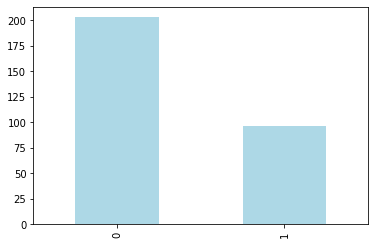

In [30]:
data_clean['death'].value_counts().plot(kind='bar',color='lightblue')

In [31]:
96/299*100

32.10702341137124

In [32]:
203/299*100

67.89297658862876

dari visualisasi diatas didapatkan bahwa jumlah pasien yang akan meninggal lebih sedikit yaitu sebesar 32.11 %, dibandingkan dengan jumlah pasien tidak meninggal sebesar 67,89 %. Dari presentase didapatkan data slight balance.

Melihat visualisasi pada kolom sex terhadap death

In [33]:
data_clean.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

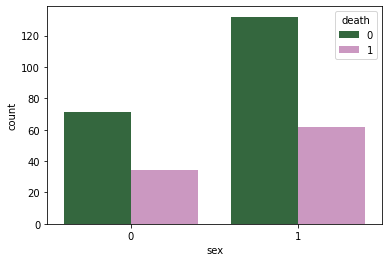

In [34]:
sns.countplot(data=data_clean,x='sex',hue='death',palette="cubehelix")

Dari visualisai diatas didaptkan bahwa jumlah tidak meninggal dan jumlah akan meninggal sama sama didominasi oleh perempuan. 

Selanjutnya melihat visualisasi pada kolom age

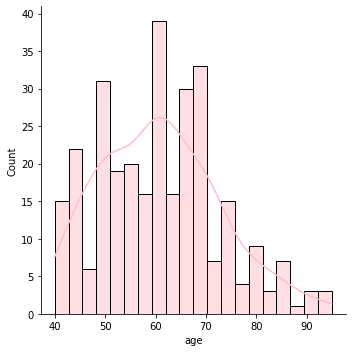

In [35]:
sns.displot(data_clean['age'],kde=True,color='pink',bins=20)

Dari visualisasi diatas didapatkan bahwa sejumlah besar pasien yang berusia antara 50 hingga 70 tahun.

Melihat rata rata waktu untuk followup terhadap death

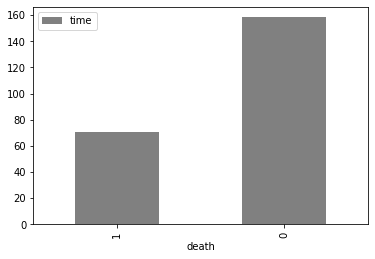

In [36]:
data_clean.groupby('death')[['time']].mean().sort_values('time').plot(kind='bar',color ='grey')

Rata rata time untuk follow up didapatkan pada 70 hari pada pasien yang akan meninggal, sedangkan untuk pasien tidak meninggal rata-rata follow up nya hampir 160 hari. 

Selanjutnya melihat visualisasi anemia terhadap death 

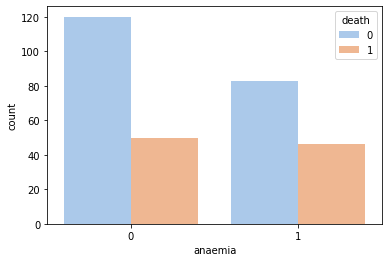

In [37]:
sns.countplot(data=data_clean,x='anaemia',hue='death',palette="pastel")

Terlihat sejumlah 50 orang akan meninggal akibat anaemia, namun juga 55 orang lainnnya meninggal karena tidak anaemia. Selain itu jumlah tertinggi ada pada orang yang tidak anemia.  

Melihat visualisai diabetes terhadap death

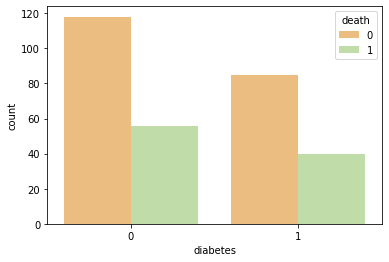

In [38]:
sns.countplot(data=data_clean,x='diabetes',hue='death',palette="Spectral")

Terlihat bahwa 40 orang akan meninggal akibat diabetes, namun 55 orang meninggal bukan karena diabetes. 

Melihat visualisasi hypertensi terhadap death

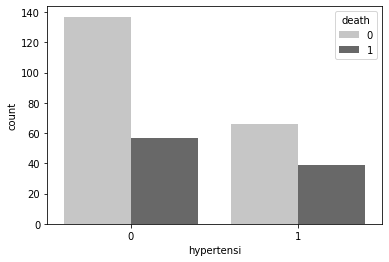

In [39]:
sns.countplot(data=data_clean,x='hypertensi',hue='death',palette="Greys")

Didapatkan bahwa jumlah akan meninggal akibat hypertensi 40 orang, namun lebih tinggi jumlah akan meninggal akibat bukan hipertensi sekitar 58. 

Melihat visualisasi antara smoking dengan death

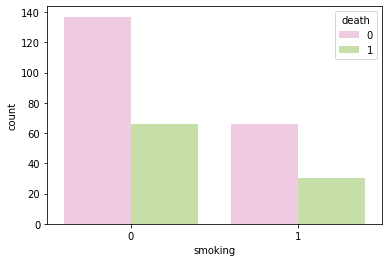

In [40]:
sns.countplot(data=data_clean,x='smoking',hue='death',palette="PiYG")

Terlihat bahwa pasien yang akan meninggal karena smoking lebih sedikit dibanding pasien akan meninggal karena tidak smoking. Namun di sisi lain jumlah tidak meninggal pun paling tinggi karena tidak smoking.  

### Split Data into Inference, Train, Test

Memisahkan data untuk model inference sebanyak 5 data dengan random_state sebesar 15.

In [41]:
#data untuk model inference
data_inf = data_clean.sample(5,random_state=15)
data_inf

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
201,40,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
291,53,0,196,0,60,0,220000.0,0.7,133,1,1,134,0
91,70,1,143,0,60,0,351000.0,1.3,137,0,0,90,1
137,60,1,231,1,25,0,194000.0,1.7,140,1,0,120,0
152,60,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


In [42]:
# Menghapus Inference-Set dari Dataset

data_train_test = data_clean.drop(data_inf.index)
data_train_test.head(2)

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,42,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46,0,168,1,17,1,271000.0,2.1,124,0,0,100,1


In [43]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,40,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
1,53,0,196,0,60,0,220000.0,0.7,133,1,1,134,0
2,70,1,143,0,60,0,351000.0,1.3,137,0,0,90,1
3,60,1,231,1,25,0,194000.0,1.7,140,1,0,120,0
4,60,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


Split data kedalam x dan y sebagai fitur dan target yang akan digunakan sebagai target adalah death dan sisanya adalah feature, data dibagi kedalan x train, y train, xtest dan y test

In [44]:
# define feature and target
X = data_train_test.drop('death', axis=1)
y = data_train_test['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(205, 12)
(89, 12)
(205,)
(89,)


Menggabungkan xtrain dan ytrain untuk modelling

In [45]:
# for EDA model 
data_eda = pd.concat([X_train, y_train], axis=1)

data_eda.shape

(205, 13)

### EDA for Modeling

Memisahkan data antara numerical dan kategorical

In [46]:
eda_num = data_eda[['age','cpk', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']].columns.tolist()

eda_cat = data_eda[['anaemia', 'diabetes', 'hypertensi', 'sex', 'smoking',  'death']].columns.tolist()

#### Numerical Features

Melihat berapa nilai skew dari kolom numerical

In [47]:
skew = data_eda[eda_num].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
age,0.531412
cpk,4.102047
ejection_fraction,0.480614
platelets,1.573290
serum_creatinine,4.430592
serum_sodium,-0.254630
time,0.071383


Mari kita lihat lebih lanjut dengan menyeleksi apakah termasuk distribusi normal atau tidak normal. 

In [48]:
nilai_skew['skew']=0
for i in nilai_skew.index:
  if (nilai_skew["distribusi"][i]>= -0.5) & (nilai_skew["distribusi"][i] <= 0.5):
    nilai_skew['skew'][i]='distribusi normal'
  else:
    nilai_skew['skew'][i]='distribusi tidak normal'
nilai_skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,distribusi,skew
age,0.531412,distribusi tidak normal
cpk,4.102047,distribusi tidak normal
ejection_fraction,0.480614,distribusi normal
platelets,1.573290,distribusi tidak normal
serum_creatinine,4.430592,distribusi tidak normal
serum_sodium,-0.254630,distribusi normal
time,0.071383,distribusi normal


In [49]:
nilai_skew['skew'].value_counts()

distribusi tidak normal    4
distribusi normal          3
Name: skew, dtype: int64

In [50]:
# new variable for plot purpose
numerical = data_eda[eda_num]

In [51]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

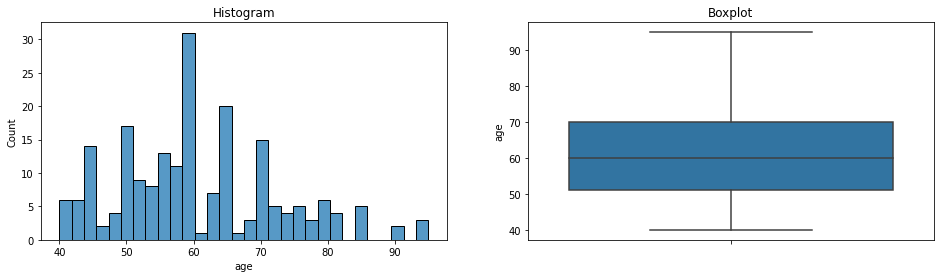

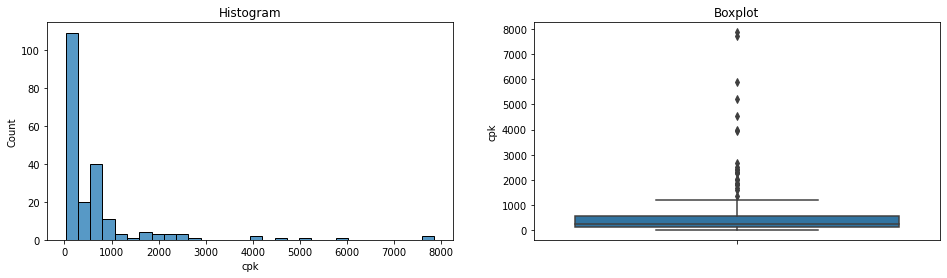

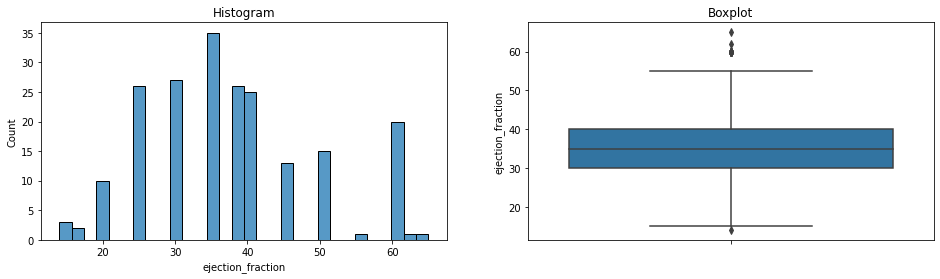

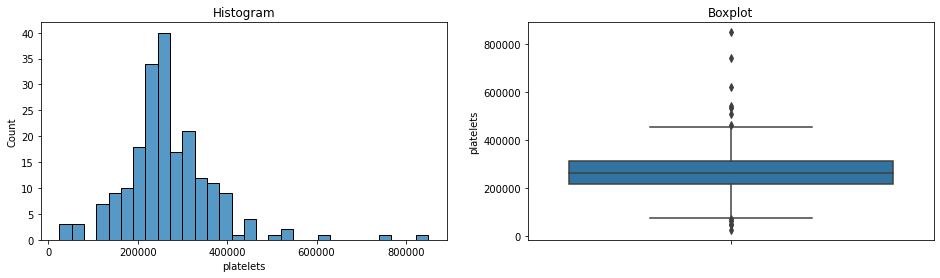

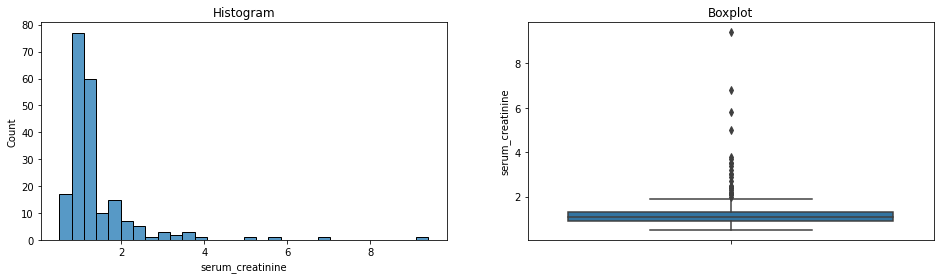

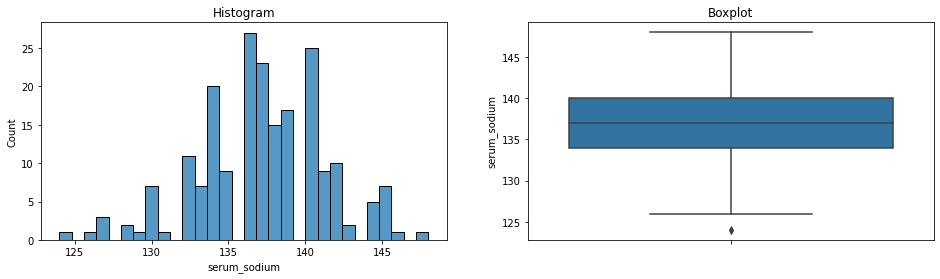

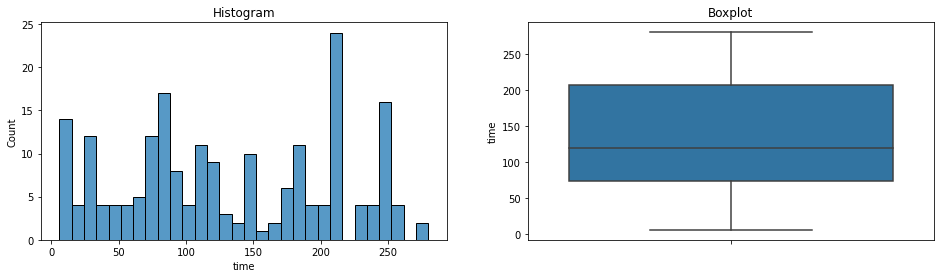

In [52]:
diagnostic_plots(numerical, 'age')
diagnostic_plots(numerical, 'cpk')
diagnostic_plots(numerical, 'ejection_fraction')
diagnostic_plots(numerical, 'platelets')
diagnostic_plots(numerical, 'serum_creatinine')
diagnostic_plots(numerical, 'serum_sodium')
diagnostic_plots(numerical, 'time')



Dari perbandingan skew nya kita lihat ada 4 distribusi tidak normal dan 3 normal,kemudian ditemukan juga adanya outlier. Namun kali ini kita tidak akan menghandling outlier dari masing-masing kolom numerical dengan asumsi bahwa data data ini harus tetap real sesuai dengan keadaan medis seorang pasien, karena pada kenyataan nya nilai anomali inilah yang menyebabkan keadaan seseorang akan meninggal.

#### Categorical Features

In [53]:
df_cat = data_eda[eda_cat]

df_cat.head()

,anaemia,diabetes,hypertensi,sex,smoking,death
213,0,0,1,1,0,1
98,1,1,0,0,0,0
96,1,0,0,0,0,0
211,0,0,0,1,1,0
33,1,1,0,0,0,1


In [54]:
df_cat.describe()

,anaemia,diabetes,hypertensi,sex,smoking,death
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.434146,0.429268,0.341463,0.653659,0.321951,0.321951
std,0.496858,0.496183,0.475361,0.476968,0.468368,0.468368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Untuk kolom categorical sudah ordinal dan berurutan semua nilainya, maka dari itu tidak dibutuhkan encoder lagi. Data sudah siap digunakan.

#### Combine Numerical and Categorical

In [55]:
data_eda.head(2)

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
213,75,0,99,0,38,1,224000.0,2.5,134,1,0,162,1
98,68,1,157,1,60,0,208000.0,1.0,140,0,0,237,0


reset index pada data model 

In [56]:
data_model= pd.concat([data_eda.reset_index(drop=True)], axis=1)

In [57]:
data_model.head()

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75,0,99,0,38,1,224000.0,2.5,134,1,0,162,1
1,68,1,157,1,60,0,208000.0,1.0,140,0,0,237,0
2,64,1,62,0,60,0,309000.0,1.5,135,0,0,174,0
3,63,0,936,0,38,0,304000.0,1.1,133,1,1,88,0
4,50,1,2334,1,35,0,75000.0,0.9,142,0,0,126,1


#### Feature Selection

Untuk feature selection akan digunakan feature importans dari Decission Tree model kemudian menggunakan chi2 dan heatmap.

#### Feature Important using Decission Tree

In [58]:
# memisahkan x dan y 
X_select = data_model.drop('death',axis=1).copy()
y_select = data_model['death']

Feature: 0, Score: 0.13
Feature: 1, Score: 0.00
Feature: 2, Score: 0.08
Feature: 3, Score: 0.00
Feature: 4, Score: 0.04
Feature: 5, Score: 0.02
Feature: 6, Score: 0.03
Feature: 7, Score: 0.16
Feature: 8, Score: 0.03
Feature: 9, Score: 0.03
Feature: 10, Score: 0.00
Feature: 11, Score: 0.48


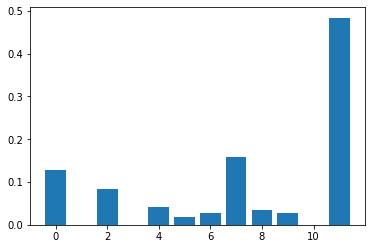

In [59]:
X, y = X_select, y_select
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature selection yang didapatkan dari metode ini untuk nilai diatas 0,1 hanya ada 3 feature yaitu 0,7,11 yaitu age,serum_creatinine,time. Mari kita bandingkan dengan mengunakan metode lain yaitu chi2.

#### Chi2

In [60]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_select, y_select)

In [61]:
chi = pd.Series(fit.scores_)
chi.index = X_select.columns
chi.sort_values(ascending=False)

platelets            42116.204940
cpk                   5239.556898
time                  2724.793940
ejection_fraction       74.324476
age                     23.491667
serum_creatinine        12.931162
serum_sodium             0.997586
hypertensi               0.397124
anaemia                  0.093297
smoking                  0.039169
sex                      0.025198
diabetes                 0.023249
dtype: float64

Dari pemilihan menggunakan chi2, didapatkan feature dg nilai diatas 10 sbb : platelets, cpk, time, ejection_fraction, age, serum_creatinine. Mari kita lihat dengan menggunakan heatmap.

#### Heatmap

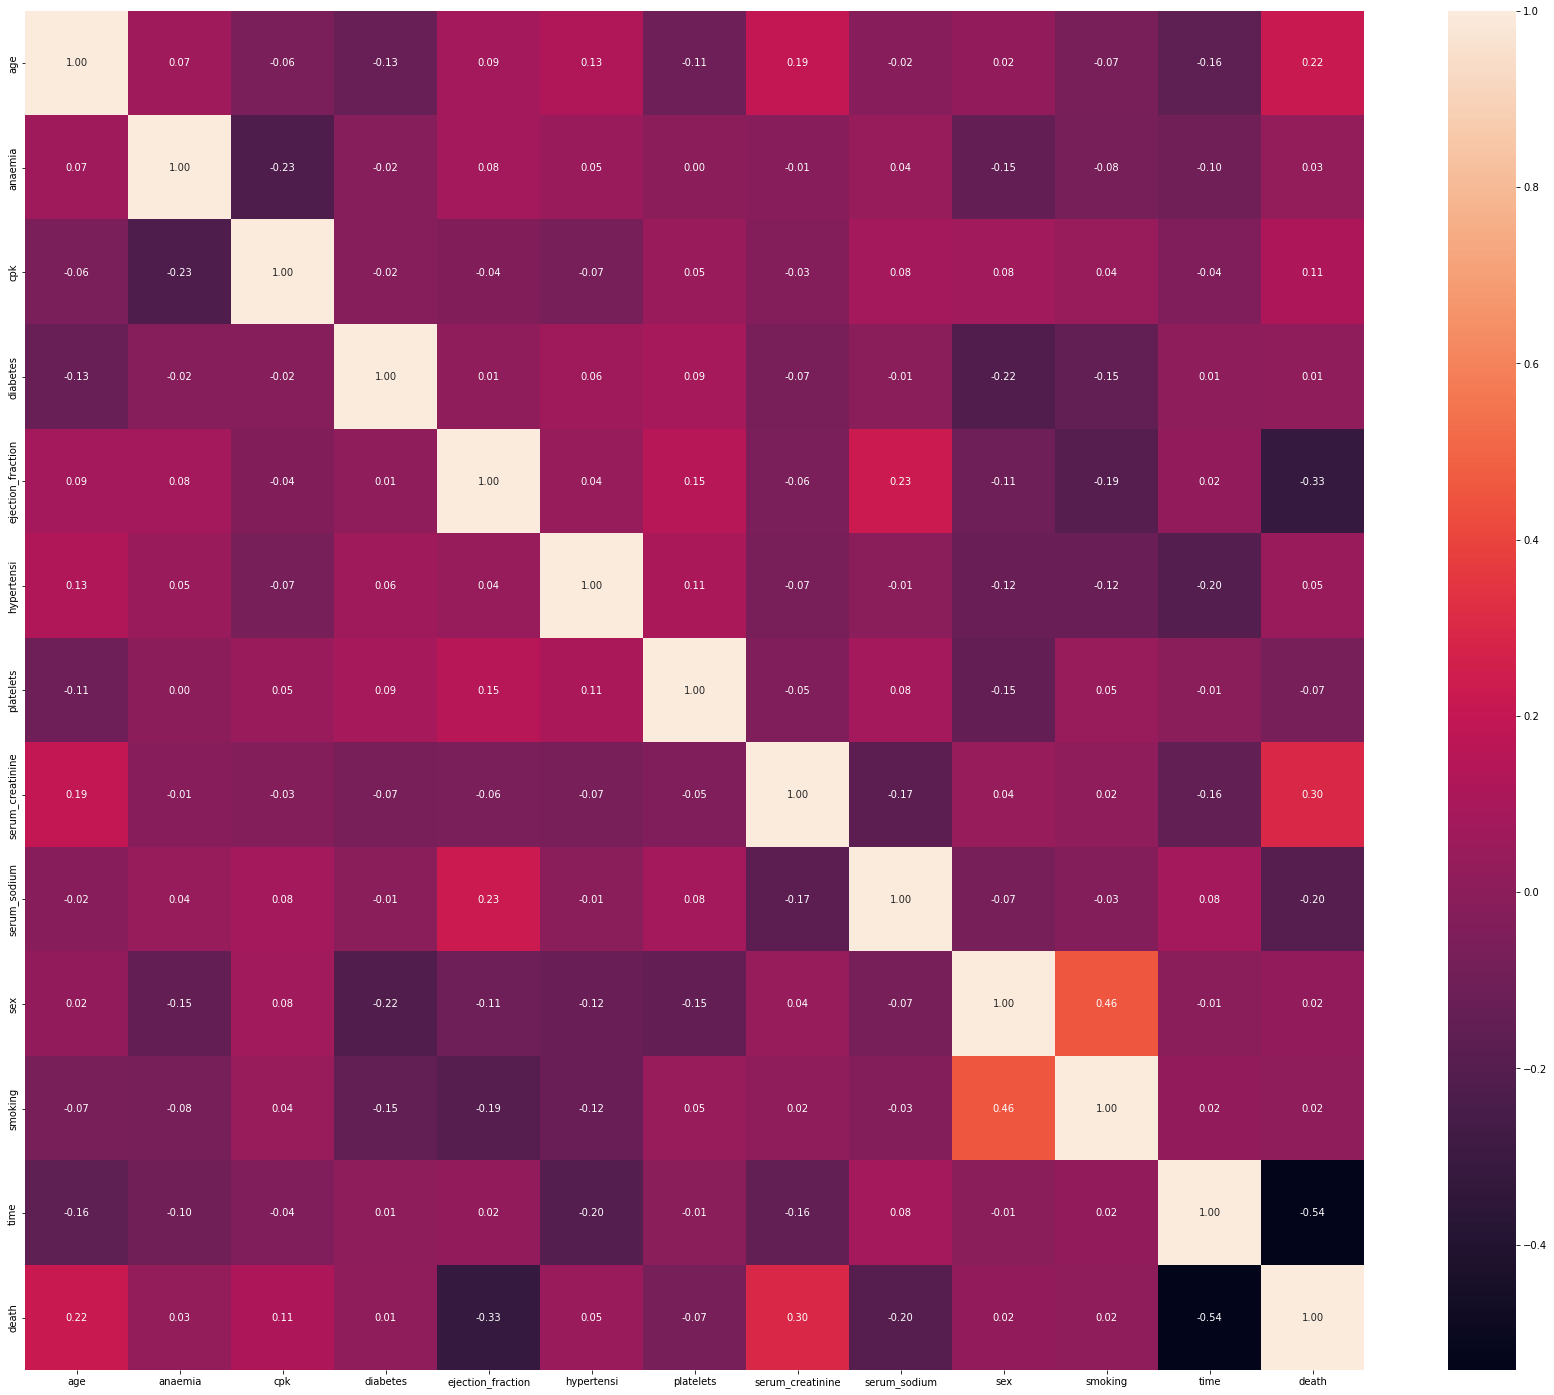

In [62]:
plt.figure(figsize=(30,25))
sns.heatmap(data_model.corr(), annot=True, fmt='.2f')
plt.show()

Dari metode ini kita dapatkan 6 feature terpilih yang mempunyai korelasi dengan death (target) dengan nilai diatas 0.1. diantaranya adalah : age,cpk,ejection_fraction,serum_creatinine,serum_sodium,time. Selanjuntya dengan mengkombinasikan pilihan feature menggunakan decission tree , chi2 dan heatmap kita mendapatkan feature terpilih sbb : age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time


In [63]:
data_model[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,75,99,38,224000.0,2.5,134,162,1
1,68,157,60,208000.0,1.0,140,237,0
2,64,62,60,309000.0,1.5,135,174,0
3,63,936,38,304000.0,1.1,133,88,0
4,50,2334,35,75000.0,0.9,142,126,1
...,...,...,...,...,...,...,...,...
200,60,2281,40,283000.0,1.0,141,187,0
201,82,379,50,47000.0,1.3,136,13,1
202,60,582,40,217000.0,3.7,134,96,1
203,50,249,35,319000.0,1.0,128,28,1


Feature yang sudah terpilih akan dilakukan scalling pada data numerical nya

In [64]:
# numerical scaling

num_col_scalling = ['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_model[num_col_scalling]))
num_scaled.columns = num_col_scalling

data_model.drop(num_col_scalling, axis=1, inplace=True)
data_model_scall = pd.concat([data_model, num_scaled], axis=1)

data_model_scall = data_model_scall[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]

In [65]:
data_model_scall.head(2)

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,0.636364,0.009696,0.470588,0.241120,0.224719,0.416667,0.569343,1
1,0.509091,0.017096,0.901961,0.221724,0.056180,0.666667,0.843066,0


Proses EDA sudah selesai , kita lanjutkan ke data preprocessing.

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

Menggabungkan data test set ke dalam variabel testing.

In [66]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head(2)

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
124,68,1,577,0,25,1,166000.0,1.0,138,1,0,43,1
39,70,0,88,1,35,1,236000.0,1.2,132,0,0,215,0


Membagi data testing kedalam numerical dan categorical 

In [67]:
num1 = testing[['age','cpk', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']].columns.tolist()
       
cat1 = testing[['anaemia', 'diabetes', 'hypertensi', 'sex', 'smoking',  'death']].columns.tolist()

In [68]:
testing_cat = testing[cat1]

testing_cat.head(2)

,anaemia,diabetes,hypertensi,sex,smoking,death
124,1,0,1,1,0,1
39,0,1,1,0,0,0


Menggabungkan data ke dalam variabel testing_mod

In [69]:
testing_mod = pd.concat([testing.reset_index(drop=True)], axis=1)
testing_mod.head(3)

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,68,1,577,0,25,1,166000.0,1.0,138,1,0,43,1
1,70,0,88,1,35,1,236000.0,1.2,132,0,0,215,0
2,63,1,103,1,35,0,179000.0,0.9,136,1,1,270,0


Memilih feature 

In [70]:
testing_model = testing_mod[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]
testing_model.head(3)

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,68,577,25,166000.0,1.0,138,43,1
1,70,88,35,236000.0,1.2,132,215,0
2,63,103,35,179000.0,0.9,136,270,0


Process scaling 

In [71]:
num_scaled_testing = pd.DataFrame(scaler.transform(testing_model[num_col_scalling]))
num_scaled_testing.columns = num_col_scalling

testing_model.drop(num_col_scalling, axis=1, inplace=True)
testing_model = pd.concat([testing_model, num_scaled_testing], axis=1)

testing_model = testing_model[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]
testing_model.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,0.509091,0.070681,0.215686,0.170809,0.056180,0.583333,0.135036,1
1,0.545455,0.008293,0.411765,0.255667,0.078652,0.333333,0.762774,0


Membagi data kedalam train dan test

In [72]:
X_train = data_model_scall.drop('death',axis=1).copy()
y_train = data_model_scall['death']

X_test = testing_model.drop('death',axis=1).copy()
y_test = testing_model['death']

## Model Building

Model yang akan digunakan adalah : 
1. RandomForestClassifier 
2. AdaBoostClassifier


In [73]:
rfc = RandomForestClassifier()
adb = AdaBoostClassifier()


Model training dengan menggunakan parameter default (baseline model) dari setiap algoritma. 

## Model Evaluation

### RandomForest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        66

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.77      0.79      0.78        29

    accuracy                           0.85        89
   macro avg       0.83      0.84      0.84        89
weighted avg       0.86      0.85      0.85        89

Confusion Matrix      : 


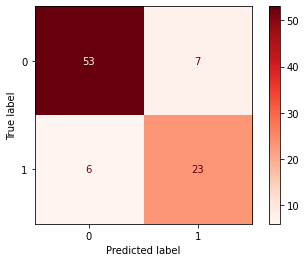

In [74]:
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
rfc_test = rfc.predict(X_test)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Reds'))

### AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       139
           1       0.96      0.97      0.96        66

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        60
           1       0.67      0.62      0.64        29

    accuracy                           0.78        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.77      0.78      0.77        89

Confusion Matrix      : 


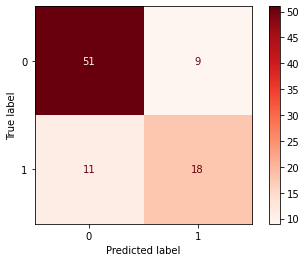

In [75]:
adb.fit(X_train, y_train)

adb_train = adb.predict(X_train)
adb_test = adb.predict(X_test)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, X_test, y_test, cmap='Reds'))

Karena urgency target yaitu death 1=prediksi akan meninggal, 0= tidak meninggal
maka yang menjadi perhatian adalah nilai 1. Dimana nilai prediksi 1 nya harus lebih tinggi daripada prediksi nilai 0. 

Kita akan menggunakan nilai recall, yaitu nilai pengukuran model bilamana kita menitikberatkan pada nilai false negative yang harus rendah dan data imbalance. Recall menggambarkan jumlah data positif yang terprediksi positif.
nilai False Negative yg artinya prediksinya 0 padahal actualnya 1 atau prediksi tidak meninggal padahal akan meninggal, hal ini harus dihindari atau bernilai lebih rendah. Jadi dari nilai recall kita lihat prediksi 1 nya harus tinggi.

Begitu juga dengan nilai dari confusion matrix nya, predict 0, actual 1 nya atau nilai false negative harus lebih rendah. 

Nilai recall dan confusion matrix yang didapatkan dari beberapa model sbb :


1. RandomForest
- 0 : 0.88
- 1 : 0.79
- confusion_matrix = False Negative nya : 6/ 29*100 = 20.69 %
2. AdaBoost
- 0 : 0.85
- 1 : 0.62
- confusion_matrix = False Negative nya : 11/29*100 = 37.93 %

Dari perhitungan sementara model yang paling bagus memprediksi nilai 1 adalah RandomForest dimana nilainya 0.79 dan confusion matrix nya juga 20.69 %, lebih rendah dibanding model lain. Sejauh ini dapat kita katakan model kita masih tidak bagus performanya. Mari kita lihat melalui cross validation. 

## Cross Validation

untuk mengevaluasi kinerja model maka akan kita gunakan cross validation dengan menggunakna skoring accuracy untuk melihat sejauh mana model konsisten dilihat dari nilai mean nya yang paling tinggi dan nilai standar deviasi nya yg paling rendah dari masing-masing model yg diterapkan untuk selanjutnya dipilih best model. 

### RandomForest

In [76]:
cv_rfc = cross_val_score(rfc,X_train, y_train, cv=3, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.82608696 0.83823529 0.86764706]
accuracy Score - Mean - Cross Validation :  0.843989769820972
accuracy Score - Std - Cross Validation  :  0.01744794197604091
accuracy Score - Range of Test-Set       :  0.826541827844931 - 0.8614377117970129


### AdaboostClassifier

In [77]:
cv_adb = cross_val_score(adb,X_train, y_train, cv=3, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.84057971 0.79411765 0.72058824]
accuracy Score - Mean - Cross Validation :  0.7850951974992896
accuracy Score - Std - Cross Validation  :  0.04940001320012566
accuracy Score - Range of Test-Set       :  0.7356951842991639 - 0.8344952106994152


### Best Score 

In [78]:
crossval = [cv_rfc,cv_adb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Random Forest','AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Random Forest,0.844,0.017
1,AdaBoost,0.785,0.049


Dari hasil cross validation didapatkan hasil bahwa Model RandomForest mendapatkan peringkat pertama dimana nilai Mean nya 0.834 dan std nya 0.042. Maka dari itu akan kita coba untuk menerapkan hyperparameter pada model ini untuk mendapatkan hasil recall yang lebig bagus.

## Hyperparameter Tuning using GridSearchCV


### Random Forest 

Mendefinisikan parameter parameter yang akan digunakan dalam pemilihan gridsearch

In [79]:
# The function to measure the quality of a split
criterion = ['gini','entropy']
# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2,3]
# Minimum number of samples required to split a node
min_samples_split = [3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Weights associated with classes in the form
class_weight =['balanced_subsample']
# Create the random grid
random_grid = {'criterion' : criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_weight,
               'random_state': [200,300]}

Menerapkan fungsi random_grid ke dalam gridseacrhcv dengan menggunakna scoring recall, seperti sudah dijelaskan sebelumnya kita akan menggunakan nilai recall. 

In [80]:
grid_search = GridSearchCV(rfc, param_grid=random_grid, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 200, 300],
                         'random_state': [200, 300]},
             return_train_score=True, scoring='recall')

Mnecari best parameter dan score nya 

In [81]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200, 'random_state': 300}
best score: 0.8030303030303031


In [82]:
rf = grid_search.best_estimator_
print(rf)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, random_state=300)


Implementasi pada data train dan test menggunakan best parameter

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       139
           1       0.83      0.88      0.85        66

    accuracy                           0.90       205
   macro avg       0.88      0.90      0.89       205
weighted avg       0.90      0.90      0.90       205

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        60
           1       0.74      0.79      0.77        29

    accuracy                           0.84        89
   macro avg       0.82      0.83      0.82        89
weighted avg       0.85      0.84      0.84        89

Confusion Matrix      : 


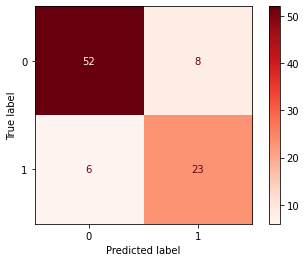

In [83]:
rf.fit(X_train, y_train)

rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

print(classification_report(y_train, rf_train))
print(classification_report(y_test, rf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Reds'))

Setelah dilakukan hyperparameter tuning pada RandomForest dan diterapkan pada data test nya hasilnya sama dengan pada saat training model dengan baseline, Nilai recall dan confusion nya sbb:

1. Baseline RandomForest
- 0 : 0.88
- 1 : 0.79
- confusion_matrix = False Negative nya : 6/ 29*100 = 20.69 %

2. Setelah Hyperparameter Tuning
- 0 : 0.87
- 1 : 0.79
- confusion_matrix = False Negative nya : 6/ 29*100 = 20.69 %

Tidak ada nilai berubah dari target yang kita inginkan. 

## Model Inference

memanggil data inference yang sudah disiapkan sebelumnya dengan nama data_inf

In [84]:
data_inf

,age,anaemia,cpk,diabetes,ejection_fraction,hypertensi,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,40,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
1,53,0,196,0,60,0,220000.0,0.7,133,1,1,134,0
2,70,1,143,0,60,0,351000.0,1.3,137,0,0,90,1
3,60,1,231,1,25,0,194000.0,1.7,140,1,0,120,0
4,60,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


Feature selection 

In [85]:
inf_model = data_inf[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]
inf_model.head(3)

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,40,582,35,222000.0,1.0,132,244,0
1,53,196,60,220000.0,0.7,133,134,0
2,70,143,60,351000.0,1.3,137,90,1


Scaling pada data inference. 

In [86]:
num_scaled_testing = pd.DataFrame(scaler.transform(inf_model[num_col_scalling]))
num_scaled_testing.columns = num_col_scalling

inf_model.drop(num_col_scalling, axis=1, inplace=True)
inf_model = pd.concat([inf_model, num_scaled_testing], axis=1)

inf_model = inf_model[['age','cpk','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','death']]
inf_model

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death
0,0.000000,0.071319,0.411765,0.238696,0.056180,0.333333,0.868613,0
1,0.236364,0.022072,0.901961,0.236271,0.022472,0.375000,0.467153,0
2,0.545455,0.015310,0.901961,0.395078,0.089888,0.541667,0.306569,1
3,0.363636,0.026537,0.215686,0.204752,0.134831,0.666667,0.416058,0
4,0.363636,0.335928,0.313725,0.339314,0.202247,0.541667,0.087591,0


In [87]:
X_inf = inf_model.drop('death',axis=1).copy()

In [88]:
X_inf

,age,cpk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.000000,0.071319,0.411765,0.238696,0.056180,0.333333,0.868613
1,0.236364,0.022072,0.901961,0.236271,0.022472,0.375000,0.467153
2,0.545455,0.015310,0.901961,0.395078,0.089888,0.541667,0.306569
3,0.363636,0.026537,0.215686,0.204752,0.134831,0.666667,0.416058
4,0.363636,0.335928,0.313725,0.339314,0.202247,0.541667,0.087591


Implementasi pada model baseline menggunakan RandomForest Classifier

In [89]:
rfc.predict(X_inf)

array([0, 0, 0, 1, 1])

Implementasi pada model dengan best parameter pada model RandomForest Classifier

In [90]:
rf.predict(X_inf)

array([0, 0, 0, 1, 1])

Disini hasil dari inference model nya memprediksi dengan tidak baik, data actual nya adalah [0,0,1,0,0]. Namun model memprediksi [0,0,0,1,1]. hal ini karena data imbalance. Selain itu data hanya berjumlah 299 sehingga kurang untuk model bisa belajar. Model hanya terlatih dengan nilai 0, namun berbeda dengan 1.  Jika data inference nya bernilai 1 model tidak bisa memprediksi dengan baik. Tetapi prediksi nilai 0 nya juga belum konsisten diterapkan. 

## Conceptual Problems

1. Apakah yang dimaksud dengan Bagging?

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?


Jawab:

1. Ensemble tree pada dasarnya ketika kita ingin melakukan prediksi tidak hanya pada satu model pohon klasifikasi tapi kita akan menggunakan banyak pohon kemudian prediksi akan dilakukan berdasarkan pada prediksi dari pohon2 tersebut. Dalam bagging , Data training diambil (Bootstrap resampling) sehingga mendapatkan Data#1. Lalu dijalankan algoritma pohon klasifikasi 1 dengan data#1. Lanjutkan proses pertama s.d. ke-k. Pada saat ingin memprediksi, kita memasukkan prediksi pada pohon pertama, pohon kedua, s.d. pohon ke-k. Hasil prediksi setiap pohon selanjutnya akan digabungkan yang disebut sebagai proses AGGREGATING(majority vote). Misalnya mayoritas hasil prediksi dari seluruh pohon tadi kategori hijau, maka yang kita pilih adalah hijau.

2. Perbedaan algoritma Random Forest dengan Adaboost adalah 
Random Forest: 

- Kumpulan Pohon besar yg antar pohonnya diperoleh secara paralel. Jadi, satu pohon dengan pohon lain saling bebas (INDEPENDEN)
- Pohon dibiarkan tumbuh besar dan algoritma splitting berhenti sesuai dengan hyperparameter yang ditentukan di awal (seperti minsplit, maxdepth, dsb).Tidak ada proses pruning (pemangkasan) pada pohon tersebut.
- Prediksi final disusun dengan menetapkan majority vote (prediksi yang dominan) dimana satu pohon satu suara, dilihat yang paling dominan.

AdaBoost: 
- Pohon kecil dibuat secara sekuensial, yang hanya diperoleh dari satu kali splitting. Pohon kecil yang hanya punya dua simpul akhir (dua daun). Karena pohonnya kecil, maka akurasinya bisa rendah sehingga sering disebut weak learner (model yang akurasi sangat kurang dibandingkan dengan pohon yang tumbuh besar)
- Pohon kecil ini dibuat satu dulu, pohon selanjutnya dibuat dari pohon sebelumnya. Hal ini karena kesalahan yang dibuat oleh pohon pertama akan memengaruhi proses pembuatan pohon yang kedua dst.
- Pengaruh ini ditandai dengan peningkatan bobot pada pengamatan yang “salah klasifikasi”. Jadi kesalahan ini akan ditingkatkan bobotnya pada tahap berikutnya.
- masing2 pohon memiliki bobot suara yang berbeda, nilai akhir adalah yang mempunyai bobot paling besar.

## Kesimpulan

1. Pada tahap EDA jika dilihat dari presentase banyakya data pada death, bisa dikatakan data imbalance, jumlah yang akan meninggal sebesar 32.11 %, dibandingkan dengan jumlah pasien tidak meninggal sebesar 67,89 %.
2. Setelah dilakukan pemodelan dengan menggunakan RandomForest dan AdaBoost dengan default parameter, dan diuji menggunakan cross validation dengan melihat nilai mean yg tinggi dan std yg rendah didapatkan best model yaitu Random Forest.
3. Hyperparameter dilakukan di model tsb dan implementasi pada data testing didapatkan nilai recall dan confusion matrix sbb :


1. Baseline RandomForest
- 0 : 0.88
- 1 : 0.79
- confusion_matrix = False Negative nya : 6/ 29*100 = 20.69 %

2. Setelah Hyperparameter Tuning
- 0 : 0.87
- 1 : 0.79
- confusion_matrix = False Negative nya : 6/ 29*100 = 20.69 %
Tidak ada nilai berubah dari target yang kita inginkan yaitu di target 1 dna nilai False negative pada confusion matrix.

4. Dapat dikatakan Model ini tidak dapat digunakan sebagai base untuk prediksi klasifikasi karena hasilnya tidak baik terbukti pada saat model inference hasilnya memprediksi dengan tidak baik, data actual nya adalah [0,0,1,0,0]. Namun model memprediksi [0,0,0,1,1]. hal ini karena data imbalance. Selain itu data hanya berjumlah 299 sehingga kurang untuk model bisa belajar. Model tidak terlatih dengan nilai 0, namun berbeda dengan 1.  Jika data inference nya bernilai 1 model tidak bisa memprediksi dengan baik. Tetapi prediksi nilai 0 nya juga belum konsisten diterapkan.
Terdapat kemungkinan juga pada saat pemilihan feature selection terdapat feature yang kurang tepat yang digunakan di dalam model. 